In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [453]:
Abalone_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
Abalone_df.columns=["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_Weight","Shell_weight","Rings"]
Abalone_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_Weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


# Data Understanding

In [454]:
len(Abalone_df)

4176

In [455]:
Abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null object
Length            4176 non-null float64
Diameter          4176 non-null float64
Height            4176 non-null float64
Whole_weight      4176 non-null float64
Shucked_weight    4176 non-null float64
Viscera_Weight    4176 non-null float64
Shell_weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.7+ KB


#### The objective of the analysis is to predict the age of Abalone. In the data, Rings is used as the proxy for the age. 
#### The dataset has physical attributes of 4176 abalones and the number of Rings on the Abalone shell.

In [456]:
df.isnull().values.any()

False

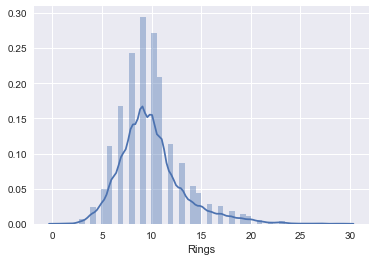

In [457]:
sns.distplot(Abalone_df['Rings'])

#### The distribution of Number of Rings is close to Normal

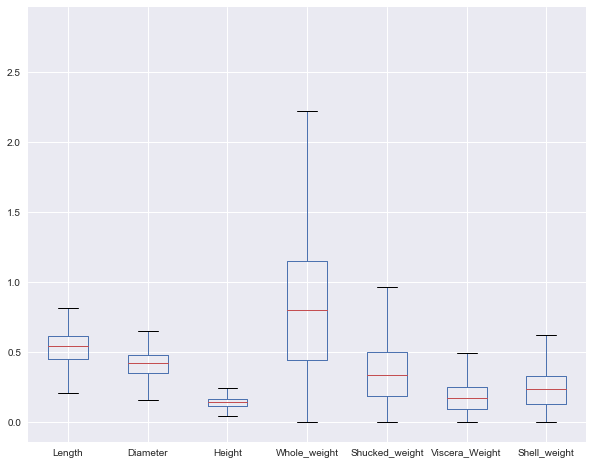

In [458]:
Abalone_df.iloc[: , :8].plot(kind='box', figsize=(10,8))

In [459]:
Abalone_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_Weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


#### Data shows that the minimum value of Height is 0, which means there is an error while data is captured. Also the maximum value of Height is much farther from the usual range. These values are to be treated before the analysis 

# Data Preprocessing

In [460]:
Abalone_df[(Abalone_df['Height'] == 0) | (Abalone_df['Height'] > 0.4)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_Weight,Shell_weight,Rings
1256,I,0.430,0.340,0.000,0.428,0.2065,0.0860,0.1150,8
1416,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2050,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8
3995,I,0.315,0.230,0.000,0.134,0.0575,0.0285,0.3505,6


#### The Height of Abalone cannot be 0. The Height captured in few records is 0 which is an error. There is an outlier seen in Height column. All these records constitute approximately 0.01%. They have been removed from the data 

In [461]:
Abalone_df = Abalone_df[(Abalone_df['Height'] > 0) & (Abalone_df['Height'] < 0.4)]

In [462]:
Abalone_df[(Abalone_df['Whole_weight'] <= Abalone_df['Shell_weight']) 
           | (Abalone_df['Whole_weight'] <= Abalone_df['Viscera_Weight'])
            | (Abalone_df['Whole_weight'] <= Abalone_df['Shucked_weight'])]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_Weight,Shell_weight,Rings
1215,I,0.310,0.225,0.070,0.1055,0.4350,0.0150,0.0400,5
2626,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5
2640,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
3085,I,0.355,0.270,0.075,0.2040,0.3045,0.0460,0.0595,7


#### In few records the Total weight is less than other weights which is not possible. These instances are considered as data errors and the reocrds have been removed which constitues approximately 0.01% of the data

In [463]:
Abalone_df = Abalone_df[(Abalone_df['Whole_weight'] >= Abalone_df['Shell_weight']) 
           & (Abalone_df['Whole_weight'] >= Abalone_df['Viscera_Weight'])
            & (Abalone_df['Whole_weight'] >= Abalone_df['Shucked_weight'])]

# Insights

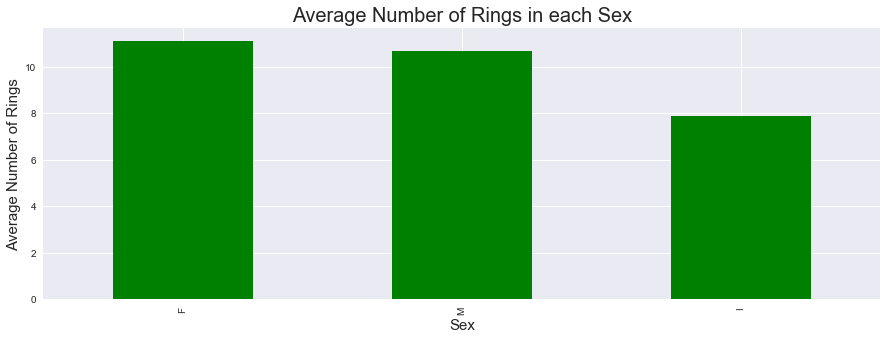

In [464]:
graph1 = Abalone_df.groupby(['Sex']).Rings.mean().sort_values(ascending=False).plot(kind='bar',figsize=(15,5),color='g')

graph1.set_ylabel('Average Number of Rings',size=15)
graph1.set_xlabel('Sex',size=15)
graph1.set_title('Average Number of Rings in each Sex',size=20)

#### The average number of Rings is seen less in Infants when compared to Fully grown Abalones.
#### The number of Rings is seen slightly higher in Female than Male

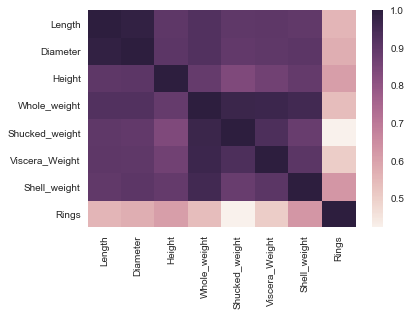

In [465]:
sns.heatmap(Abalone_df.corr())

#### Of all the predictors, shell weight has the highest correlation with Number of Rings. 
#### There is a very high correlation seen among all the predictor variables. 

In [442]:
# Abalone_df.corr()

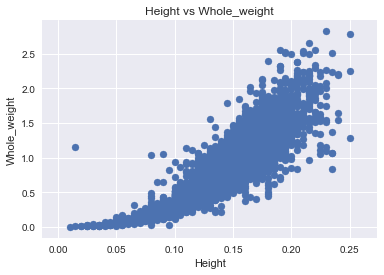

In [466]:
plt.scatter(Abalone_df['Height'], Abalone_df['Whole_weight'])

plt.xlabel('Height')
plt.ylabel('Whole_weight')
plt.title('Height vs Whole_weight')

#### There is a strong correlation observed between Height and Weight. Weight of the Abalone exponentially increases with Height

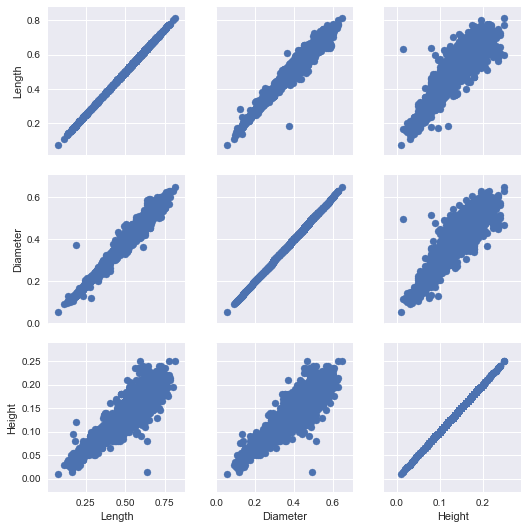

In [468]:
data = Abalone_df.iloc[: ,1 :4]
g = sns.PairGrid(data)
g.map(plt.scatter)

#### Height, length and diameter have strong linear relationship. Similar relation is seen in the next plot, among all the variables related to weight

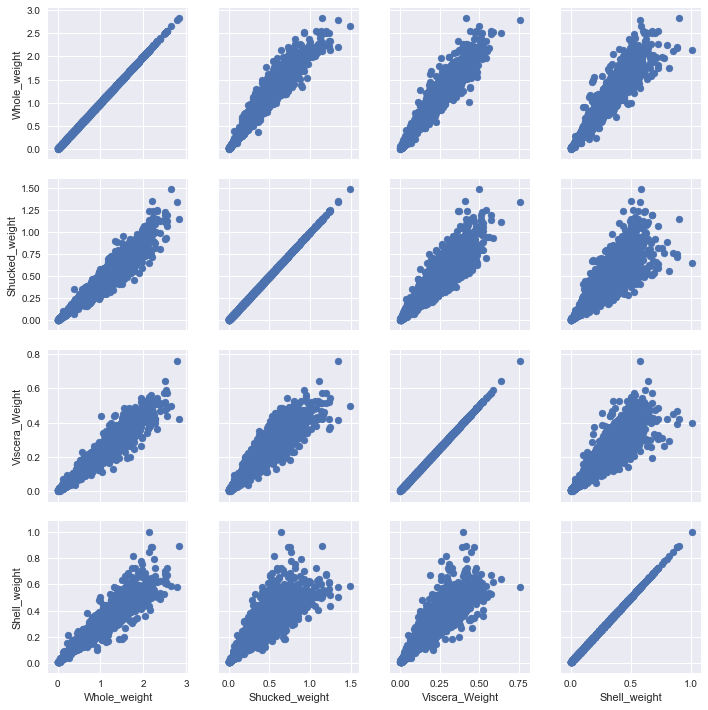

In [469]:
data = Abalone_df.iloc[: ,4 :8]
g = sns.PairGrid(data)
g.map(plt.scatter)

#### The above two graphs show that all the variables are trying to explain the same variablity which would lead to multicollinearity problem

In [470]:
Abalone_df['Sex'].loc[Abalone_df['Sex'] == 'F'] = 0
Abalone_df['Sex'].loc[Abalone_df['Sex'] == 'M'] = 1
Abalone_df['Sex'].loc[Abalone_df['Sex'] == 'I'] = 2

C:\Users\geeth\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Since the column Sex is categorical, this column is converted to integer type

# Implementation of ML Algorithms to predict Rings

#### Since there is strong correlation between the predictor variables, PLS and Lasso Regression are used. These ML techniques take care of Multicollinearity 

# Splitting test and train

In [471]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Abalone_df.iloc[: , :8], Abalone_df['Rings'], test_size=0.30)

# Partial Linear Regression (PLS)

In [472]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

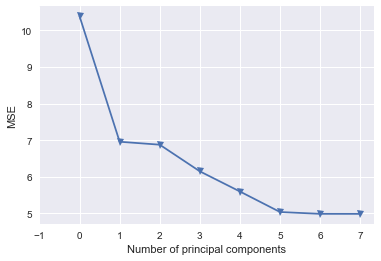

In [482]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Abalone_df.iloc[: , :8], Abalone_df['Rings'], test_size=0.30)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.xlim(xmin=-1);

#### The first five components are enough to explain the data variability. hence these are used for predictiton.

In [474]:
X_reduced_test = pca2.transform(scale(X_test))[:,:6]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:6], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
RMSE_PLS = np.sqrt(mean_squared_error(y_test, pred))
RMSE_PLS

2.2991717677907118

# Lasso Regression

In [475]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.001)
reg.fit(X_train,y_train)

pred = reg.predict(X_test)

RMSE_LASSO = np.sqrt(mean_squared_error(y_test, pred))
RMSE_LASSO

2.2502273792643099

# Linear Regression

#### Linear Regression doesn't have the in-built capability to deal with multicollinearity. Hence in this model, only Whole_weight is used among continous variables.
#### This model has the following advantage over the above two models. 
#### 1. The relation between predictor variable and Predicting variable can be quantified
#### 2. Since we are using only Whole_weight, age can still be predicted when Abalone is still alive

In [476]:
X = Abalone_df[['Whole_weight','Sex']]
Y = Abalone_df['Rings']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [477]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [478]:
predictions = lm.predict(X_test)

RMSE_LS = np.sqrt(mean_squared_error(Y_test,predictions))
RMSE_LS

2.5869269545501763

# Model Accuracies

In [479]:
[RMSE_PLS, RMSE_LS, RMSE_LASSO]

[2.2991717677907118, 2.5869269545501763, 2.2502273792643099]

#### Among the three models, Lasso has the best Accuracy. 
#### This model has a limitation. It cannot explain the impact of each predictor vaiable on the final output. 
#### If we need to explain the relation between predictor and Number of Rings, linear regression should be used. Since all the input variables are highly correlated with each other,  only one of the input variables should be used to avoid Multicollinearity.